In [6]:
# prompt: mount drive to this

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
script_path = "/content/drive/MyDrive/financial/finance/sac_risk_adjusted/run_experiment.py"
if os.path.exists(script_path):
    !python "{script_path}"
else:
    print(f"File not found: {script_path}")


▶️ Starting Experiment: DDPG_RiskAdjusted
Episode 100/3000 | Avg Shortfall: $95,954,625.53
Episode 200/3000 | Avg Shortfall: $99,058,078.53
Episode 300/3000 | Avg Shortfall: $95,512,023.72
Episode 400/3000 | Avg Shortfall: $94,183,579.79
Episode 500/3000 | Avg Shortfall: $93,798,565.69
Episode 600/3000 | Avg Shortfall: $95,773,786.63
Episode 700/3000 | Avg Shortfall: $96,391,137.46
Episode 800/3000 | Avg Shortfall: $96,513,838.49
Episode 900/3000 | Avg Shortfall: $91,922,702.79
Episode 1000/3000 | Avg Shortfall: $94,436,150.05
Episode 1100/3000 | Avg Shortfall: $95,876,884.09
Episode 1200/3000 | Avg Shortfall: $97,635,560.50
Episode 1300/3000 | Avg Shortfall: $93,708,439.59
Episode 1400/3000 | Avg Shortfall: $94,294,270.78
Episode 1500/3000 | Avg Shortfall: $96,931,547.12
Episode 1600/3000 | Avg Shortfall: $96,451,647.27
Episode 1700/3000 | Avg Shortfall: $95,190,216.64
Episode 1800/3000 | Avg Shortfall: $97,658,199.51
Episode 1900/3000 | Avg Shortfall: $95,351,686.54
Episode 2000/300

Loading and plotting data...
  - Plotted results_DDPG_RiskAdjusted.csv
  - ⚠️ WARNING: Could not find file results_SAC_RiskAdjusted.csv. Skipping.


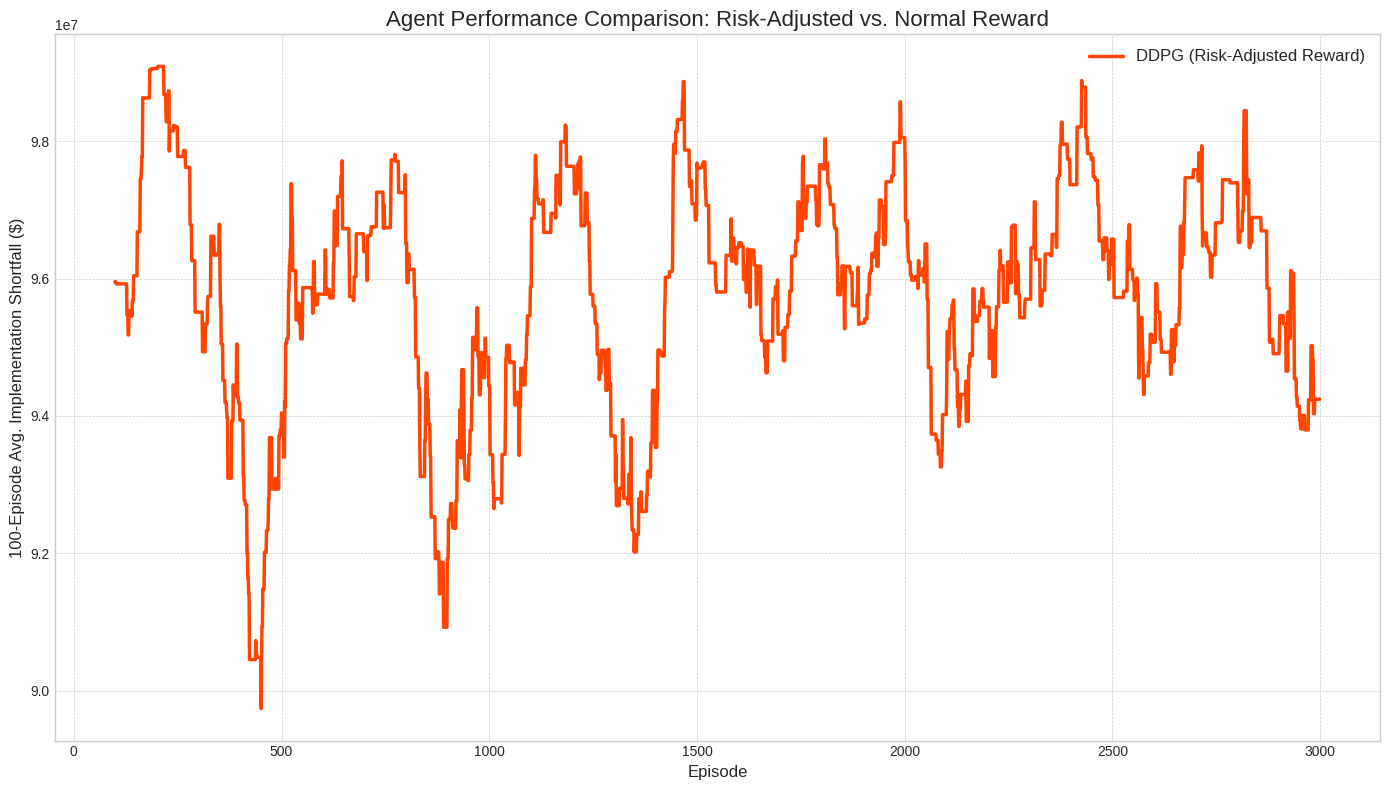

In [4]:
# visualize.py
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURE YOUR PLOT ---
# Add the experiments you want to compare.
# IMPORTANT: You'll need to copy the CSV file from your previous best SAC run
# into this folder and update its filename here for comparison.
experiments_to_plot = [
    {
        'name': 'DDPG (Risk-Adjusted Reward)',
        'filename': 'results_DDPG_RiskAdjusted.csv',
        'color': 'orangered'
    },
    # {
    #     'name': 'SAC (Risk-Adjusted Reward)',
    #     'filename': 'results_SAC_RiskAdjusted.csv',
    #     'color': 'blue'
    # },
    # {
    #     'name': 'SAC (Normal Reward - Previous Best)',
    #     'filename': 'results_SAC_best_seed_42.csv', # <-- Make sure this file exists
    #     'color': 'green'
    # }
]

# --- PLOTTING LOGIC ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))
window_size = 100

print("Loading and plotting data...")
for experiment in experiments_to_plot:
    try:
        df = pd.read_csv(experiment['filename'])
        moving_avg = df['shortfall'].rolling(window=window_size).mean()
        ax.plot(moving_avg.index, moving_avg, label=experiment['name'], color=experiment['color'], linewidth=2.5)
        print(f"  - Plotted {experiment['filename']}")
    except FileNotFoundError:
        print(f"  - ⚠️ WARNING: Could not find file {experiment['filename']}. Skipping.")

# Add title and labels
ax.set_title('Agent Performance Comparison: Risk-Adjusted vs. Normal Reward', fontsize=16)
ax.set_xlabel('Episode', fontsize=12)
ax.set_ylabel(f'{window_size}-Episode Avg. Implementation Shortfall ($)', fontsize=12)
ax.legend(fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

experimenting with original AC market env

In [8]:
!python /content/drive/MyDrive/financial/finance/sac_risk_adjusted/run_experiment.py


Starting Experiment: DDPG_RiskAdjusted
Traceback (most recent call last):
  File "/content/drive/MyDrive/financial/finance/sac_risk_adjusted/run_experiment.py", line 58, in <module>
    agent = config['agent_class'](
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/MyDrive/financial/finance/sac_risk_adjusted/ddpg_agent.py", line 35, in __init__
    self.actor_optimizer = optim.Adam(
                           ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/optim/adam.py", line 99, in __init__
    super().__init__(params, defaults)
  File "/usr/local/lib/python3.11/dist-packages/torch/optim/optimizer.py", line 377, in __init__
    self.add_param_group(cast(dict, param_group))
  File "/usr/local/lib/python3.11/dist-packages/torch/_compile.py", line 27, in inner
    import torch._dynamo
  File "/usr/local/lib/python3.11/dist-packages/torch/_dynamo/__init__.py", line 3, in <module>
    from . import convert_frame, eval_frame, resume_execution
  File "/usr/local/